In [29]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 
import pickle 
import joblib
from sklearn.pipeline import Pipeline
from sklearn.tree import export_text

import numpy as np 
import pandas as pd 


In [13]:
# Load your saved pipeline from the .pkl file along with the preprocessor 
with open(r'..\model\model_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)
with open(r"..\model\preprocessor.pkl", 'rb') as file: 
    preprocessor = pickle.load(file) 

In [20]:
X = pd.read_csv(r'..\data\processed\X.csv')
y = pd.read_csv(r'..\data\processed\y.csv')

In [21]:
preprocess_data =  preprocessor.fit_transform(X)

In [37]:
X_transformed = preprocessor.transform(X)

In [22]:
preprocess_data

<778006x3398 sparse matrix of type '<class 'numpy.float64'>'
	with 9336072 stored elements in Compressed Sparse Row format>

In [23]:

# Get the column names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()

In [25]:
len(transformed_feature_names)

3398

In [27]:
# Assuming 'pipeline' is your pipeline
rf_classifier = pipeline.named_steps['classifier']


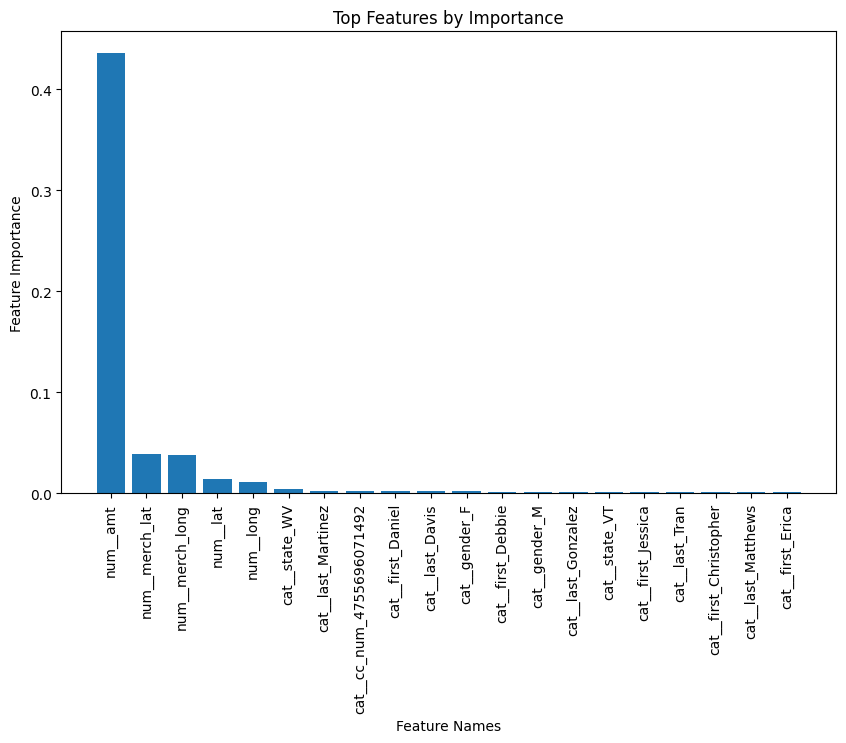

In [30]:
import matplotlib.pyplot as plt

# Assuming 'rf_classifier' is your RandomForestClassifier
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

top_n = 20  # Adjust the number of features to display
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[indices][:top_n], align="center")
plt.xticks(range(top_n), transformed_feature_names[indices][:top_n], rotation='vertical')
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance")
plt.title("Top Features by Importance")
plt.show()


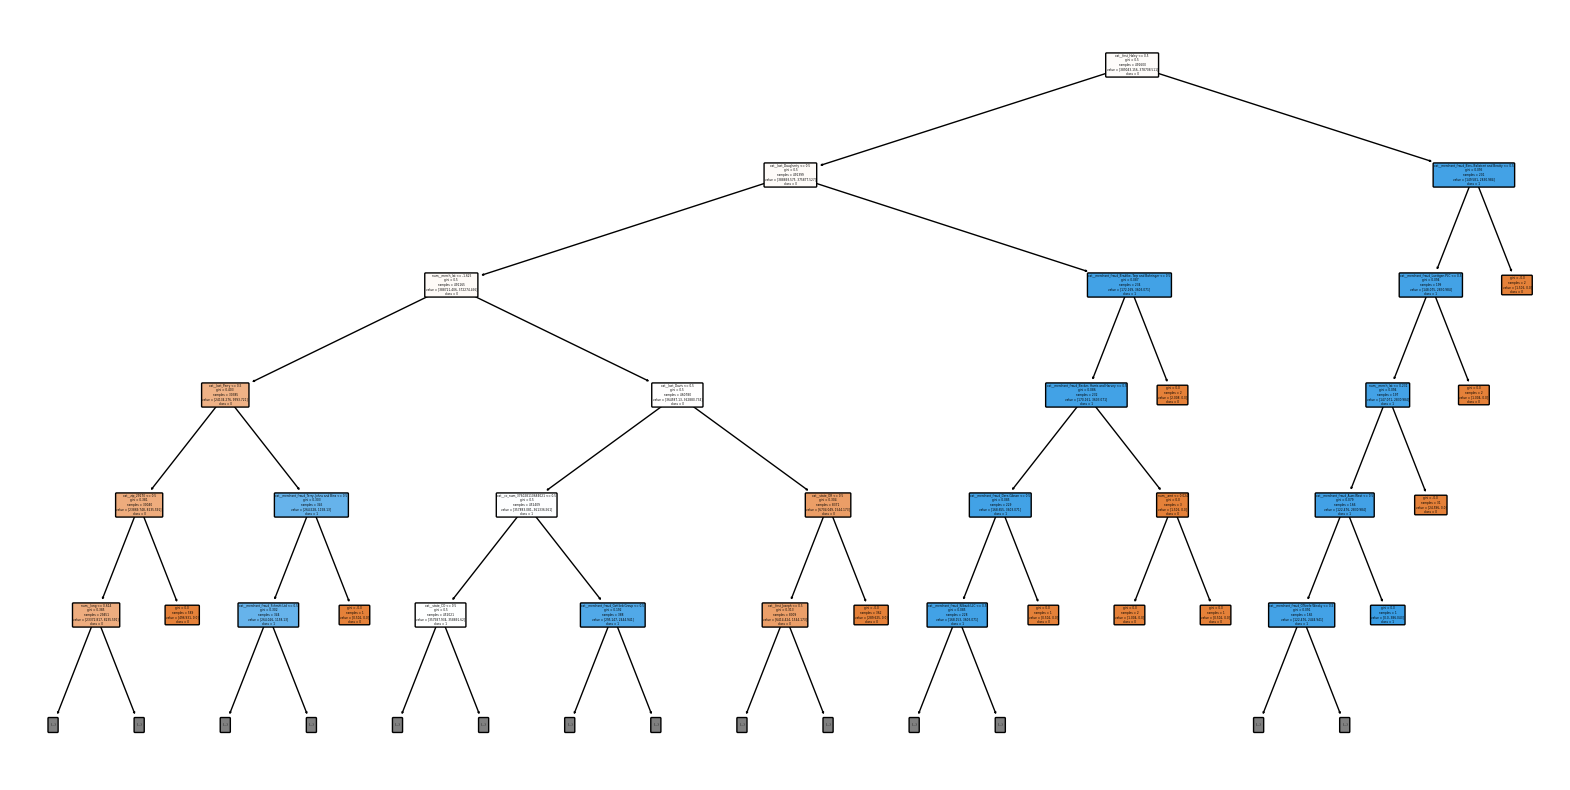

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], max_depth=5, feature_names=transformed_feature_names, filled=True, rounded=True, class_names=["0", "1"])
plt.show()

In [39]:
import seaborn as sns

# Assuming 'X_transformed' is your transformed data as a sparse matrix
X_transformed_dense = X_transformed.toarray()

# Compute the correlation matrix for the dense matrix
correlation_matrix = pd.DataFrame(X_transformed_dense).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Transformed Features")
plt.show()